                                 Fréquence  POURCENTAGE
0             1 ou plusieurs fois par mois    16.392857
3                  Moins d'1 fois par mois    26.965517
4  Tous les jours de la semaine ou presque    32.172414
1                   1 à 2 fois par semaine    14.034483
2                   C'est la première fois    11.250000


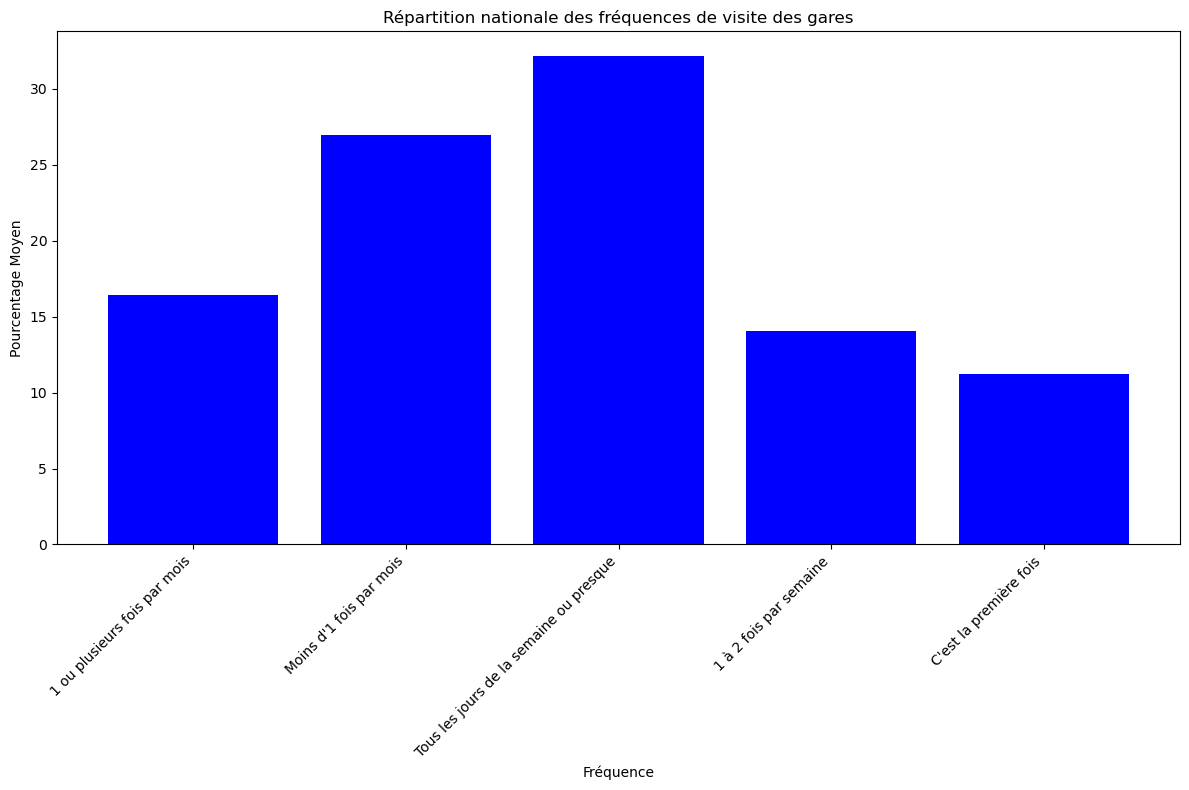

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'frequence-gare.csv'
data = pd.read_csv(file_path, delimiter=';')  


data.columns = ['UIC', 'Gare enquêtée', 'Fréquence', 'POURCENTAGE', 'Année']


data['POURCENTAGE'] = pd.to_numeric(data['POURCENTAGE'], errors='coerce')
data['Année'] = pd.to_numeric(data['Année'], errors='coerce')


mean_percentage_by_motif = data.groupby('Fréquence')['POURCENTAGE'].mean().reset_index()


motif_order = ["1 ou plusieurs fois par mois", "Moins d'1 fois par mois", "Tous les jours de la semaine ou presque", "1 à 2 fois par semaine", "C'est la première fois", ""]
mean_percentage_by_motif['Fréquence'] = pd.Categorical(mean_percentage_by_motif['Fréquence'], categories=motif_order, ordered=True)


mean_percentage_by_motif = mean_percentage_by_motif.sort_values('Fréquence')


print(mean_percentage_by_motif)


plt.figure(figsize=(12, 8)) 
plt.bar(mean_percentage_by_motif['Fréquence'], mean_percentage_by_motif['POURCENTAGE'], color='blue')
plt.xlabel('Fréquence')  
plt.ylabel('Pourcentage Moyen') 
plt.title('Répartition nationale des fréquences de visite des gares')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

plt.savefig('ETUDE_SNCF_FREQUENCE_GARE.pdf')
from IPython.display import FileLink

display(FileLink('ETUDE_SNCF_FREQUENCE_GARE.pdf'))
plt.show() 


